# Threshold Evaluation

This stage evaluates the results with the detector, comparing them with the original spiketrains. To do this, it requires to load the NEO files and then, for each of them, load the corresponding files with the detection results.

## Loading NEO files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Archivos/data"

In [3]:
from eapprocessor.tools.load import load_neo, load_count_evaluation, get_evaluation_files

In [4]:
noise_levels = [5, 15, 25]
resolution = 12
fs=20000
dirs_neo = [
    f"{BASE_DIR}/output-correlated/preprocessor",
    f"{BASE_DIR}/output-uncorrelated-color/preprocessor",   
    f"{BASE_DIR}/output-correlated-color/preprocessor",  
]

In [5]:
neo_list=[]
neo_files=[]
for dir_neo in dirs_neo:
    tmp_list = []
    tmp_files = []
    for noise_level in noise_levels:
        neo_dict, file = load_neo(dir_neo, 
                                  verbose=True, 
                                  resolution=resolution, 
                           noise_level=noise_level, fs=fs)
        tmp_list += [neo_dict]
        tmp_files += [file]
    neo_list += [tmp_list]
    neo_files += [tmp_files]

Search for pattern: *_12_5uV_20000Hz*
Loading file /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *_12_15uV_20000Hz*
Loading file /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_15uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *_12_25uV_20000Hz*
Loading file /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *_12_5uV_20000Hz*
Loading file /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *_12_15uV_20000Hz*
Loading file /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_15uV_20000Hz_2021-10-08_12-04.h5
Search for pattern: *_12_25uV_20000Hz*
Loading file /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-08_12-04.h5
Search for pattern: *_12_5uV_20000Hz*
Loading file

Exploring the neo list of dictionaries and the neo files:

In [6]:
print("Neo list", neo_list)
print("Neo files", neo_files)

Neo list [[{'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7f59342544f0>, 'w': <HDF5 dataset "w": shape (4,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}, {'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7f58eeeb6d90>, 'w': <HDF5 dataset "w": shape (4,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}, {'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">, '

## Load evaluators

Then for each NEO file grabs the corresponding evaluators

In [9]:
dirs_eval = [
    f"{BASE_DIR}/output-correlated/evaluator",
    f"{BASE_DIR}/output-uncorrelated-color/evaluator",   
    f"{BASE_DIR}/output-correlated-color/evaluator",  
]

In [10]:
evaluator_files_dict_list = [[ get_evaluation_files(dir_eval,sourcefile=neo_file)
                              for neo_file in neo_files[idx]] for idx, dir_eval in enumerate(dirs_eval)]

Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_15uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-correlated/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-08_12-03.h5
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_15uV_20000Hz_2021-10-08_12-04.h5
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-uncorrelated-color/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-08_12-04.h5
Search for pattern

Then, loads the count values to plot and compare them

In [11]:
counts_list = [[load_count_evaluation(**evaluator_files_dict) 
                 for evaluator_files_dict in evaluator_files_dict_single_noise]
               for evaluator_files_dict_single_noise in evaluator_files_dict_list]

In [16]:
counts_list[0][0]

[{'channels': <HDF5 dataset "channels": shape (3,), type "<i8">,
  'recordings': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'normalized': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'neo': <HDF5 dataset "counts": shape (4, 3, 50), type "<f8">},
 {'channels': <HDF5 dataset "channels": shape (3,), type "<i8">,
  'recordings': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'normalized': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'neo': <HDF5 dataset "counts": shape (4, 3, 50), type "<f8">},
 {'channels': <HDF5 dataset "channels": shape (3,), type "<i8">,
  'recordings': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'normalized': <HDF5 dataset "counts": shape (3, 50), type "<f8">,
  'neo': <HDF5 dataset "counts": shape (4, 3, 50), type "<f8">}]

In [12]:
from eapprocessor.plot.evaluator import plot_counts_evaluator

In [13]:
%matplotlib inline

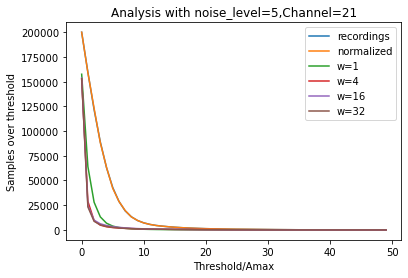

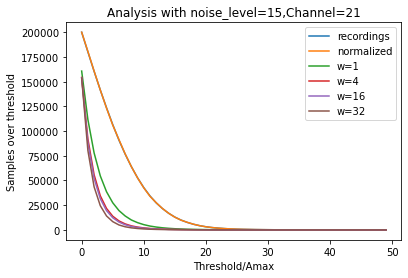

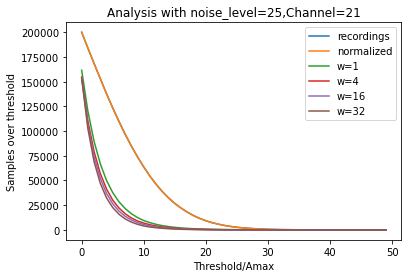

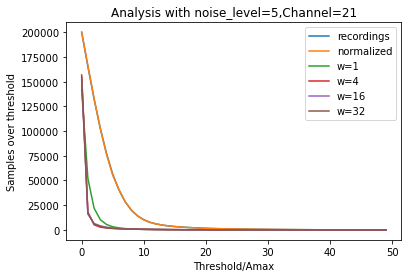

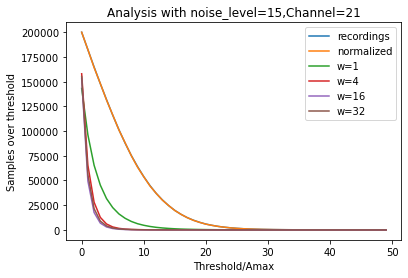

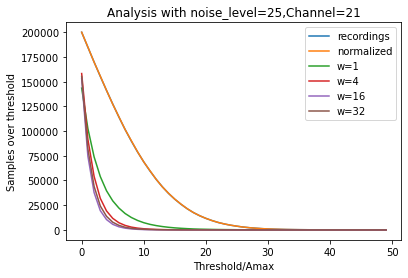

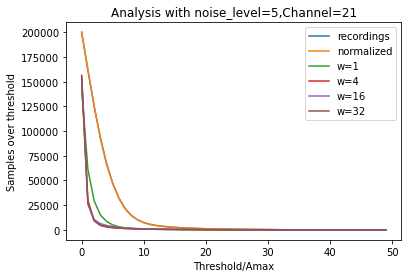

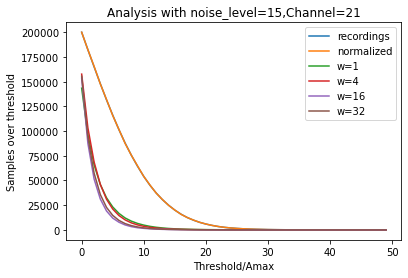

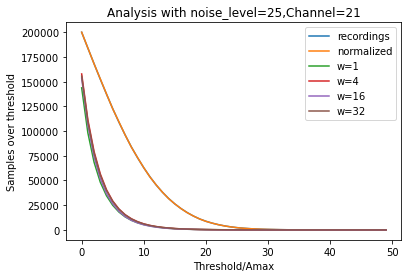

In [17]:
for ndx, counts_item_single_noise in enumerate(counts_list):  
    for idx,counts_item in enumerate(counts_item_single_noise):
        plot_counts_evaluator(counts_item,neo_list[ndx][idx], channels_idx=range(1))

## Evaluating neo with 5uV noise

Use the first recording to explore and evaluate the results

### Exploring the spiketrains

As all the recordings has the same spiketrains, then taking the first neo_dict we can extract the spiketrains.

In [19]:
spiketrain_obj_list = neo_list[0][0]["recordings"].spiketrains

In [20]:
import numpy as np

In [21]:
spiketrain_list = [np.array(spiketrain[:]) for spiketrain in spiketrain_obj_list]
print(spiketrain_list[0])

[0.06306313 0.09835651 0.17468134 1.35781948 1.87151452 1.92956291
 2.45076891 2.54931775 2.72318618 3.5889415  4.11254186 4.23857638
 4.29791657 4.44321244 4.53272058 5.02129526 5.02602492 5.30705183
 5.59190746 5.62608856 5.77413182 5.7855642  6.46583001 7.68394504
 7.70296327 8.38360658 8.6482491  9.06565181 9.3717065  9.63996295
 9.64631662 9.71885169 9.96091592]


In general, all spiketrains has different number of spikes

In [22]:
spiketrain_count_list = [len(spiketrain) for spiketrain in spiketrain_list]
print(spiketrain_count_list)

[33, 49, 57, 44, 67, 58, 58, 109, 140, 158]


It also, has different types of cells (excitatory 'E' and inhibitory 'I')

In [23]:
spiketrain_type_list = [spiketrain.annotations["cell_type"] for spiketrain in spiketrain_obj_list]
print(spiketrain_type_list)

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I']


An important value to consider is the SNR

In [24]:
spiketrain_snr_list = [spiketrain.annotations["snr"] for spiketrain in spiketrain_obj_list]
print(spiketrain_snr_list)

[11.411595916748047, 16.500270080566406, 14.246652221679687, 13.619544982910156, 11.47311782836914, 45.16163330078125, 36.113006591796875, 51.98359375, 29.354965209960938, 26.663070678710938]


With the info grabbed from spiketrains, it could be plotted with them

In [25]:
from eapprocessor.plot.spikes import plot_spikes_array, plot_spikes_from_neo

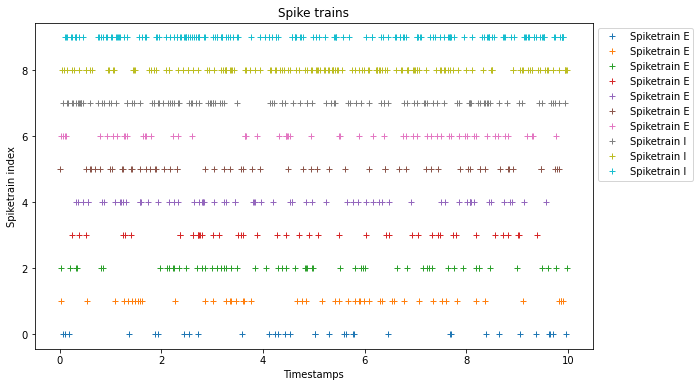

In [26]:
plot_spikes_from_neo(neo_dict)

### Estimate positions of spiketrains

This requires to approximate the spiketrains to positions in the timestamps. It uses the fist of neo objects at all have the same spiketrains.

In [27]:
timestamps = neo_list[0][0]["recordings"].timestamps[:]
print(timestamps)

[0.00000e+00 5.00000e-05 1.00000e-04 ... 9.99985e+00 9.99990e+00
 9.99995e+00]


In [28]:
from eapprocessor.evaluator.spikes import estimate_sample_spikes, comparison_detection_spiketrain

In [29]:
indexes_list = []
errors_list = []
for spiketrain in spiketrain_list:
    indexes, errors = estimate_sample_spikes(spikes=spiketrain,timestamps=timestamps)
    indexes_list += [indexes]
    errors_list += [errors]

In [30]:
print(indexes_list)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


We can explore the estimated positions for spiketrains related to the timestamps, and detect where there are two o mor spikes estimated in the same position:

In [31]:
indexes_total = np.sum(indexes_list, axis=0)
print(indexes_total)

[0. 0. 0. ... 0. 0. 0.]


In [32]:
max(indexes_total)

2.0

To explore where are those spike estimated in the same position:

In [33]:
import matplotlib.pyplot as plt

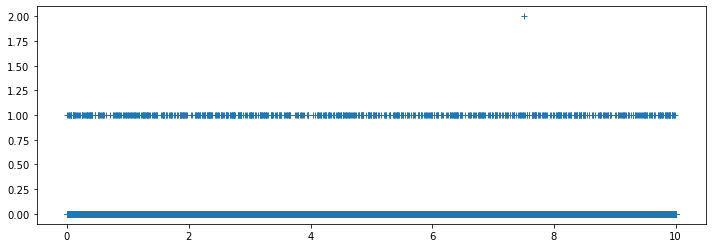

In [34]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(timestamps,indexes_total,'+')

In [35]:
nw_indexes_total = (indexes_total>0)*np.ones(indexes_total.shape)

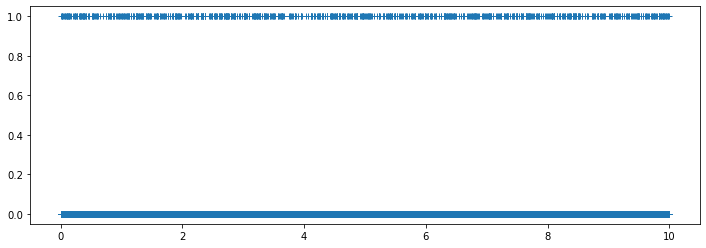

In [36]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(timestamps,nw_indexes_total,'+')

In [37]:
sum(nw_indexes_total)

772.0

The module written has a function that combine spikes positions and uniformize to 1.

In [38]:
from eapprocessor.evaluator.spikes import combine_spiketrains

In [39]:
uniformized_indexes_total = combine_spiketrains(indexes_list=indexes_list)
print("Max value:", max(uniformized_indexes_total))
print("Lenght value:", len(uniformized_indexes_total))
print("Total spikes:", len(uniformized_indexes_total[uniformized_indexes_total>0]))

Max value: 1.0
Lenght value: 200000
Total spikes: 772


### Evaluate with 5uV noise level

In [42]:
neo_dict = neo_list[0][0]
evaluator_files_dict = evaluator_files_dict_list[0][0]
print(neo_dict)
print(evaluator_files_dict)

{'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7f59342544f0>, 'w': <HDF5 dataset "w": shape (4,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}
{'recordings_file': PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_recordings_subset_50th_12_5uV_20000Hz_2021-10-08_12-05.h5'), 'normalized_file': PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_normalized_subset_50th_12_5uV_20000Hz_2021-10-08_12-05.h5'), 'neo_file': PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-08_12-05.h5')}


In [43]:
from eapprocessor.tools.load import load_evaluation

#### Evaluation with recordings

In [44]:
recordings_dict = load_evaluation(evaluator_files_dict["recordings_file"])

Then, use the first channel for the whole test :

In [45]:
recordings_evaluation_first_channel = recordings_dict["indexes"][1]

In [46]:
result_evaluation_list = [comparison_detection_spiketrain(indexes, recordings_evaluation_first_channel[10]) 
          for indexes in indexes_list]
result_evaluation_list

[{'truepositive': 26.0,
  'falsepositive': 4189.0,
  'falsenegative': 7.0,
  'truenegative': 195778.0},
 {'truepositive': 1.0,
  'falsepositive': 4214.0,
  'falsenegative': 48.0,
  'truenegative': 195737.0},
 {'truepositive': 2.0,
  'falsepositive': 4213.0,
  'falsenegative': 55.0,
  'truenegative': 195730.0},
 {'truepositive': 1.0,
  'falsepositive': 4214.0,
  'falsenegative': 43.0,
  'truenegative': 195742.0},
 {'truepositive': 2.0,
  'falsepositive': 4213.0,
  'falsenegative': 65.0,
  'truenegative': 195720.0},
 {'truepositive': 55.0,
  'falsepositive': 4160.0,
  'falsenegative': 3.0,
  'truenegative': 195782.0},
 {'truepositive': 4.0,
  'falsepositive': 4211.0,
  'falsenegative': 54.0,
  'truenegative': 195731.0},
 {'truepositive': 108.0,
  'falsepositive': 4107.0,
  'falsenegative': 1.0,
  'truenegative': 195784.0},
 {'truepositive': 140.0,
  'falsepositive': 4075.0,
  'falsenegative': 0.0,
  'truenegative': 195785.0},
 {'truepositive': 4.0,
  'falsepositive': 4211.0,
  'falsenega

In [47]:
truepositive = [ item["truepositive"] for item in result_evaluation_list]
falsenegative = [ item["falsenegative"] for item in result_evaluation_list]

In [48]:
from eapprocessor.plot.evaluator import plot_accuracy_evaluator

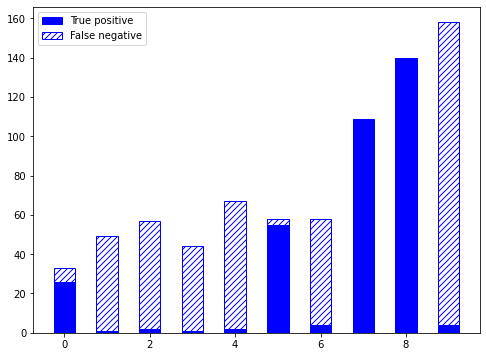

In [49]:
plot_accuracy_evaluator(truepositive,falsenegative)

#### Evaluation with NEO

In [50]:
neo_evaluation_dict = load_evaluation(evaluator_files_dict["neo_file"])

Evaluating with w=1 and with the first channel

In [51]:
neo_evaluation_first_channel = neo_evaluation_dict["indexes"][3][1]

Then, compare the indexes with the threshold at $0.05A_{\max}$

In [52]:
neo_results_first_channel = [comparison_detection_spiketrain(indexes, neo_evaluation_first_channel[1]) 
                             for indexes in indexes_list]
neo_results_first_channel

[{'truepositive': 32.0,
  'falsepositive': 8688.0,
  'falsenegative': 1.0,
  'truenegative': 191279.0},
 {'truepositive': 4.0,
  'falsepositive': 8716.0,
  'falsenegative': 45.0,
  'truenegative': 191235.0},
 {'truepositive': 4.0,
  'falsepositive': 8716.0,
  'falsenegative': 53.0,
  'truenegative': 191227.0},
 {'truepositive': 5.0,
  'falsepositive': 8715.0,
  'falsenegative': 39.0,
  'truenegative': 191241.0},
 {'truepositive': 3.0,
  'falsepositive': 8717.0,
  'falsenegative': 64.0,
  'truenegative': 191216.0},
 {'truepositive': 58.0,
  'falsepositive': 8662.0,
  'falsenegative': 0.0,
  'truenegative': 191280.0},
 {'truepositive': 6.0,
  'falsepositive': 8714.0,
  'falsenegative': 52.0,
  'truenegative': 191228.0},
 {'truepositive': 109.0,
  'falsepositive': 8611.0,
  'falsenegative': 0.0,
  'truenegative': 191280.0},
 {'truepositive': 140.0,
  'falsepositive': 8580.0,
  'falsenegative': 0.0,
  'truenegative': 191280.0},
 {'truepositive': 6.0,
  'falsepositive': 8714.0,
  'falsenega

By simple inspection, this neo can only capture spiketrains at index 1 and 6. However, to appreciate better, we plot them considering the true positive and false negative values.

Something interesting to denote is that for channel 6 which is apparently the predominant signal in the recording, there are two spikes not detected, so we can locate at the time and observe why are not detected.

In [53]:
from eapprocessor.evaluator.spikes import get_false_negatives_times, get_false_negatives

In [54]:
get_false_negatives(indexes_list[0],neo_evaluation_first_channel[0])

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
get_false_negatives_times(indexes_list[0],neo_evaluation_first_channel[0],timestamps)

array([], dtype=float64)

#### Plot accuracy

To identify the signals that predominates in determined signal, we can plot the found spikes considering the truepositives and false negatives values.

In [56]:
truepositive = [ item["truepositive"] for item in neo_results_first_channel]
falsenegative = [ item["falsenegative"] for item in neo_results_first_channel]

In [57]:
from eapprocessor.plot.evaluator import plot_accuracy_evaluator

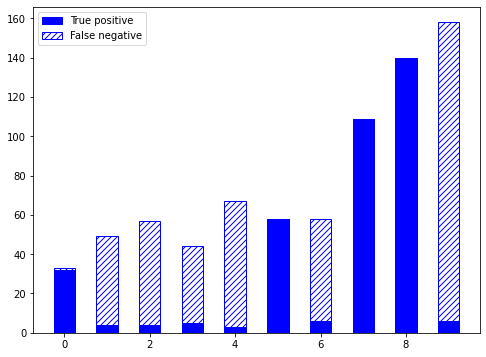

In [58]:
plot_accuracy_evaluator(truepositive,falsenegative)

### Plot ROC for first channel

In [59]:
from eapprocessor.evaluator.spikes import comparison_detection_array_spiketrain_array, convert_to_roc

In [68]:
comparison_list = [ comparison_detection_array_spiketrain_array(indexes_list, test_result[1]) 
                   for test_result in neo_evaluation_dict["indexes"] ]

In [69]:
comparison_list[0].shape

(50, 10)

In [70]:
tpr_list = []
fpr_list = []
for comparison in comparison_list:
    tpr, fpr = convert_to_roc(comparison, range_reference=[5,7,8])
    tpr_list +=[tpr]
    fpr_list +=[fpr]

In [71]:
tpr_list[0].shape

(50, 3)

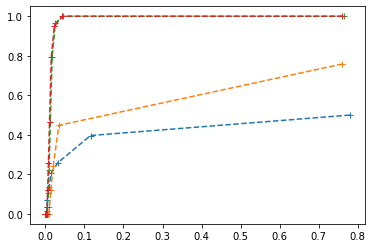

In [72]:
for idx in range(len(tpr_list)):
    plt.plot(fpr_list[idx][:,0],tpr_list[idx][:,0],'+--')

The module has a function to facilitate the plot of ROC curves

In [73]:
from eapprocessor.plot.evaluator import plot_roc_list

In [74]:
w = neo_dict["w"]
spike_indexes = [5,7,8]

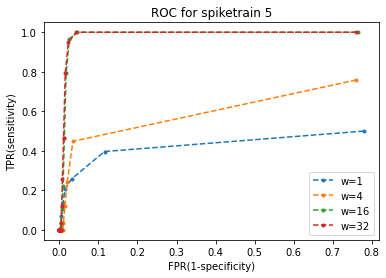

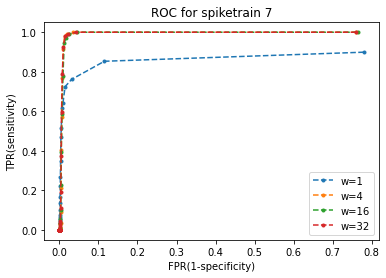

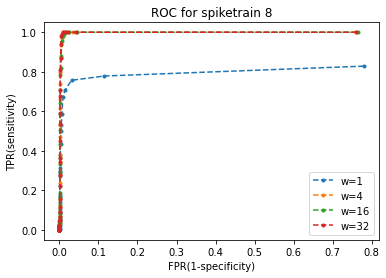

In [75]:
plot_roc_list(fpr_list=fpr_list, tpr_list=tpr_list, 
            labels=[f"w={w_i}" for w_i in w],
            spiketrains_labels=spike_indexes)

#### Evaluating combined effects

In [80]:
from eapprocessor.evaluator.spikes import combine_spiketrains, comparison_detection_array_spiketrain

In [81]:
indexes_list = np.array(indexes_list)
new_reference = combine_spiketrains(indexes_list=indexes_list[spike_indexes])

In [82]:
comparison_combined_list = [ comparison_detection_array_spiketrain(new_reference, test_result[1]) 
                   for test_result in neo_evaluation_dict["indexes"] ]

In [83]:
comparison_combined_list[0].shape

(50,)

In [84]:
combined_tpr_list = []
combined_fpr_list = []
for comparison in comparison_combined_list:
    tpr, fpr = convert_to_roc(comparison)
    combined_tpr_list +=[tpr]
    combined_fpr_list +=[fpr]

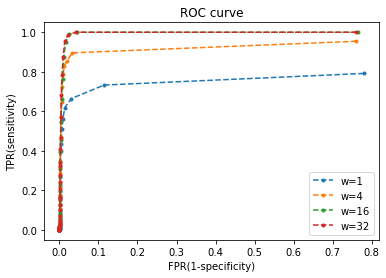

In [85]:
plot_roc_list(fpr_list=combined_fpr_list, tpr_list=combined_tpr_list, 
               labels=[f"w={w_i}" for w_i in w])

### Evaluating ROC for recordings at different noise levels

In [86]:
comparison_recordings = comparison_detection_array_spiketrain_array(indexes_list, recordings_dict["indexes"][1])

In [87]:
tpr_rec, fpr_rec = convert_to_roc(comparison_recordings, range_reference=spike_indexes)

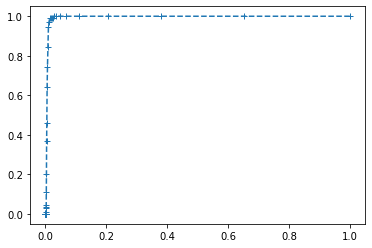

In [88]:
plt.plot(fpr_rec[:,1],tpr_rec[:,1],'+--')

In [90]:
dics_recording = [[load_evaluation(evaluator_files_dict["recordings_file"]) 
                  for evaluator_files_dict in evaluator_files_dict_single]
                  for evaluator_files_dict_single in evaluator_files_dict_list]

In [92]:
comparison_recordings_list = [[comparison_detection_array_spiketrain_array(indexes_list, dic["indexes"][1]) 
                                for dic in dic_single]
                               for dic_single in dics_recording]

In [94]:
tpr_rec_list = []
fpr_rec_list = []
for comparison_recordings_single in comparison_recordings_list:
    tmp_tpr_list = []
    tmp_fpr_list = []
    for comparison_rec in comparison_recordings_single:
        tpr_rec, fpr_rec = convert_to_roc(comparison_rec, range_reference=spike_indexes)
        tmp_tpr_list +=[tpr_rec]
        tmp_fpr_list +=[fpr_rec]
    tpr_rec_list +=[tmp_tpr_list]
    fpr_rec_list +=[tmp_fpr_list]

Plot for recordings at different noise levels

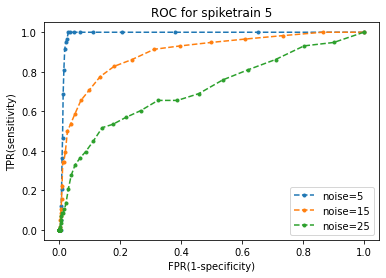

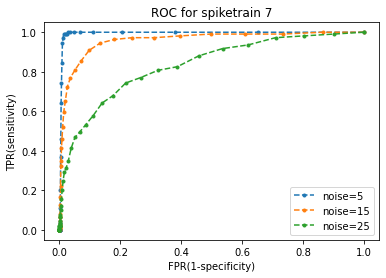

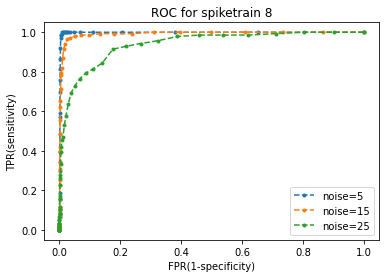

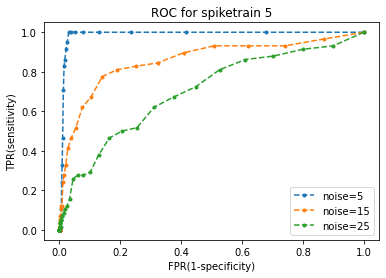

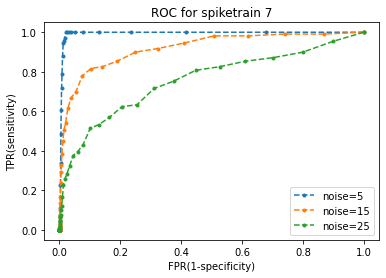

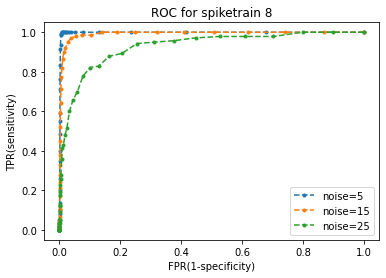

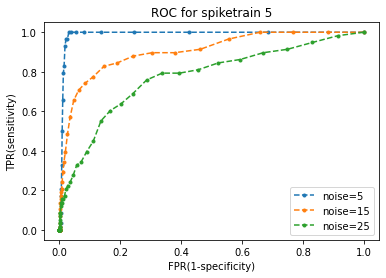

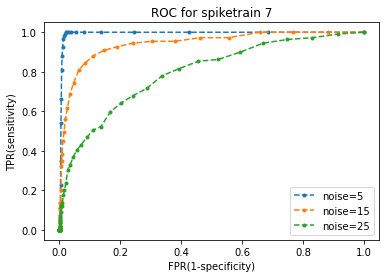

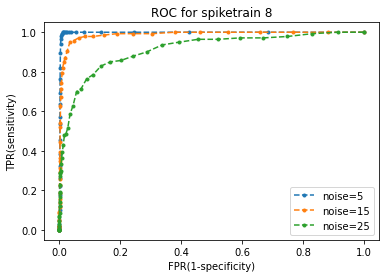

In [95]:
for idx, fpr_single in enumerate(fpr_rec_list):
    plot_roc_list(fpr_list=fpr_single, tpr_list=tpr_rec_list[idx], 
            labels=[f"noise={noise_level}" for noise_level in noise_levels],
            spiketrains_labels=spike_indexes)

### Evaluation for NEO at different noise levels

In [96]:
from eapprocessor.process import get_results_evaluation_dataset_array

In [97]:
evaluator_files_neo = [[evaluator_files_dict["neo_file"]
                        for evaluator_files_dict in evaluator_files_single] 
                       for evaluator_files_single in evaluator_files_dict_list]
evaluator_files_neo

[[PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-08_12-05.h5'),
  PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_neo_subset_50th_12_15uV_20000Hz_2021-10-08_12-06.h5'),
  PosixPath('/mnt/Archivos/data/output-correlated/evaluator/threshold_neo_subset_50th_12_25uV_20000Hz_2021-10-08_12-06.h5')],
 [PosixPath('/mnt/Archivos/data/output-uncorrelated-color/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-08_12-06.h5'),
  PosixPath('/mnt/Archivos/data/output-uncorrelated-color/evaluator/threshold_neo_subset_50th_12_15uV_20000Hz_2021-10-08_12-07.h5'),
  PosixPath('/mnt/Archivos/data/output-uncorrelated-color/evaluator/threshold_neo_subset_50th_12_25uV_20000Hz_2021-10-08_12-07.h5')],
 [PosixPath('/mnt/Archivos/data/output-correlated-color/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-08_12-08.h5'),
  PosixPath('/mnt/Archivos/data/output-correlated-color/evaluator/threshold_neo_subset_50th_12_1

In [117]:
neo_evaluation_dics = [get_results_evaluation_dataset_array(evaluator_files_neo_single, 
                                                            indexes_list, channel_idx=1)
                       for evaluator_files_neo_single in evaluator_files_neo]

In [118]:
neo_evaluation_dics[0][0].shape

(4, 50, 10)

In [119]:
len(neo_evaluation_dics[0])

3

In [120]:
from eapprocessor.evaluator.spikes import convert_to_roc_list

In [121]:
tpr_neo_list= []
fpr_neo_list= []
for neo_evaluation_dic_single in neo_evaluation_dics:
    t_tpr_neo_list, t_fpr_neo_list = convert_to_roc_list(neo_evaluation_dic_single, range_reference=spike_indexes)
    tpr_neo_list +=[t_tpr_neo_list]
    fpr_neo_list +=[t_fpr_neo_list]

In [122]:
tpr_neo_list[0].shape

(3, 4, 50, 3)

/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/neural-signal-processing/eapprocessor/plot/evaluator.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


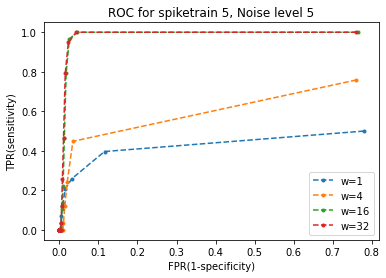

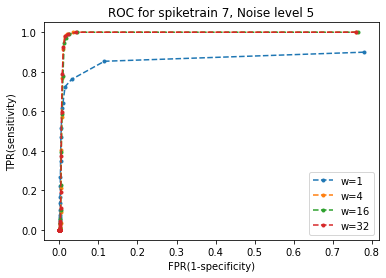

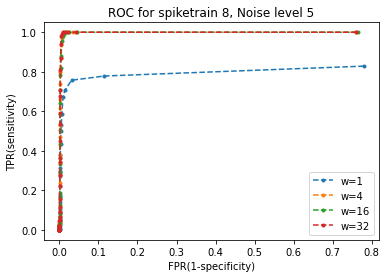

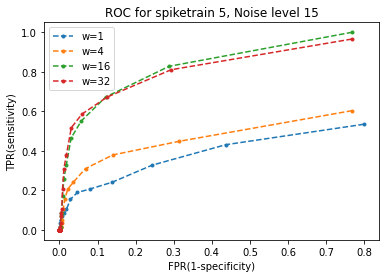

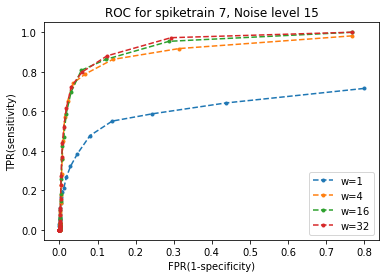

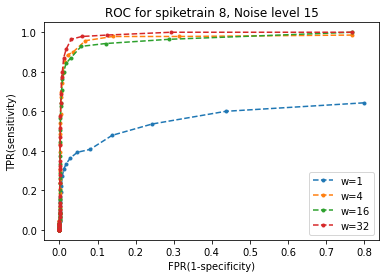

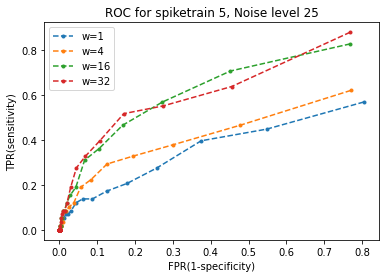

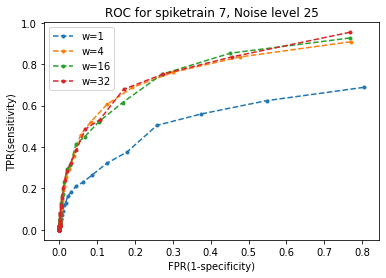

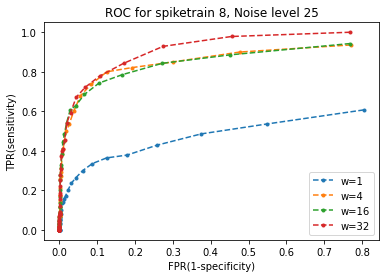

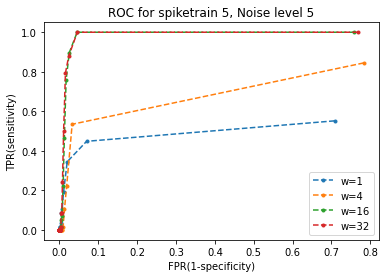

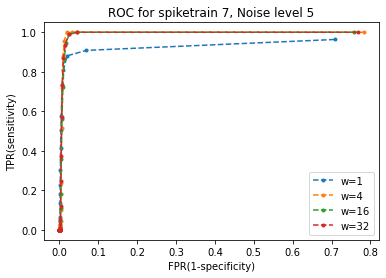

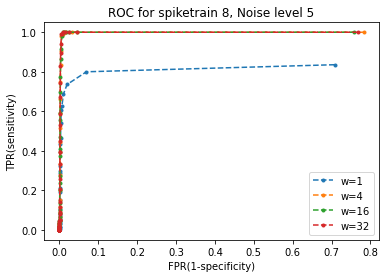

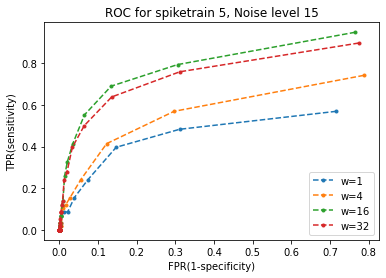

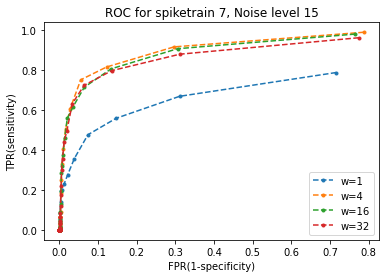

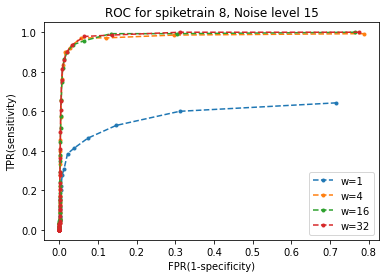

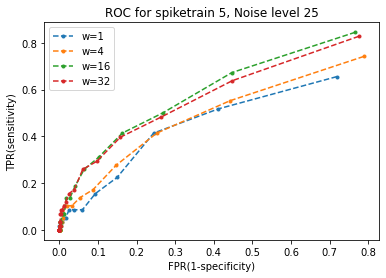

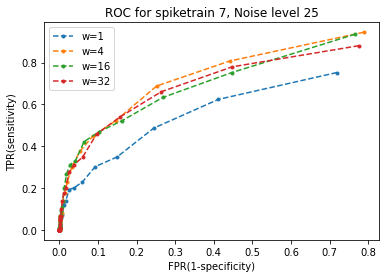

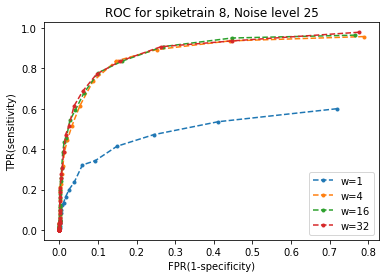

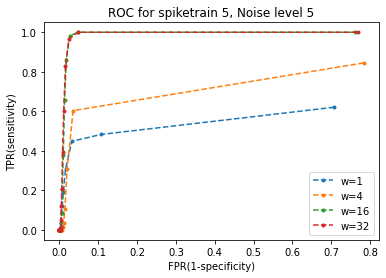

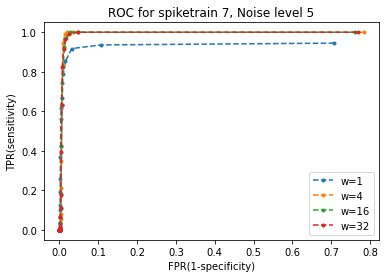

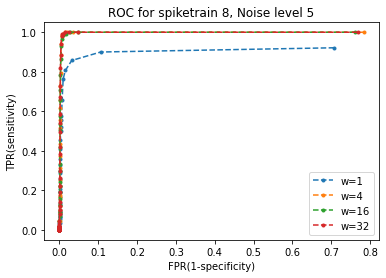

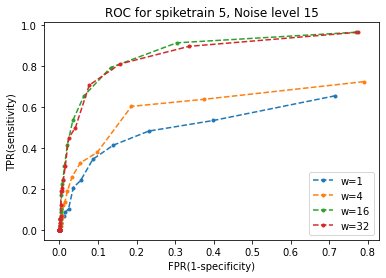

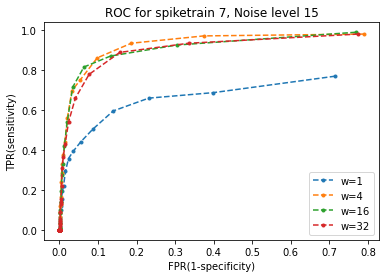

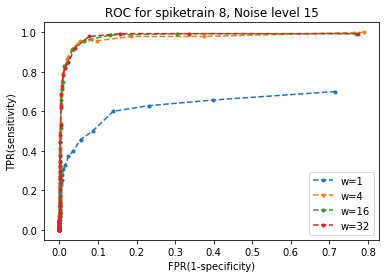

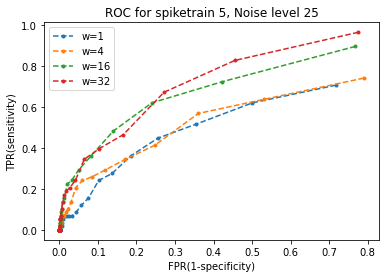

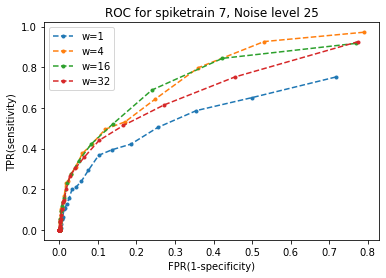

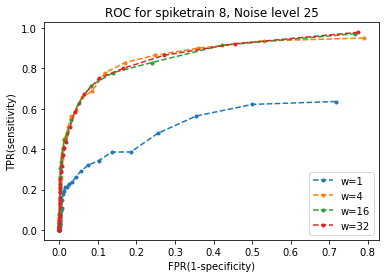

In [123]:
for ndx,tpr_neo_single in enumerate(tpr_neo_list):
    for idx, tpr_neo in enumerate(tpr_neo_single):
        plot_roc_list(fpr_list=fpr_neo_list[ndx][idx], tpr_list=tpr_neo, 
                    labels=[f"w={w_i}" for w_i in w],
                    spiketrains_labels=spike_indexes,
                    append_title=f", Noise level {noise_levels[idx]}")

Then the results with neo could be grouped together with recordings to compare the results with them:

In [125]:
tpr_all_list = np.array([[[tpr_rec_list[ndx][idx]] + list(tpr_neo_list[ndx][idx]) 
                           for idx in range(len(tpr_neo_list[ndx]))] 
                         for ndx in range(len(tpr_neo_list))])
fpr_all_list = np.array([[[fpr_rec_list[ndx][idx]] + list(fpr_neo_list[ndx][idx]) 
                         for idx in range(len(fpr_neo_list[ndx]))]
                        for ndx in range(len(fpr_neo_list))])

In [126]:
tpr_all_list.shape

(3, 3, 5, 50, 3)

/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/neural-signal-processing/eapprocessor/plot/evaluator.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


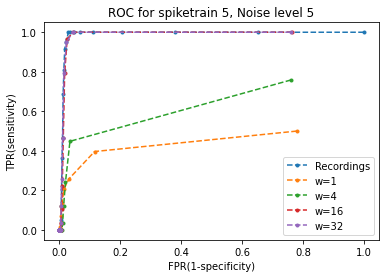

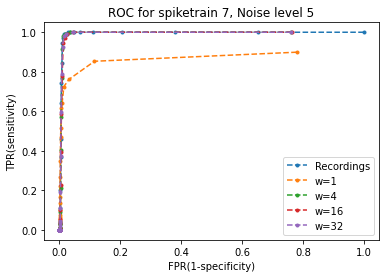

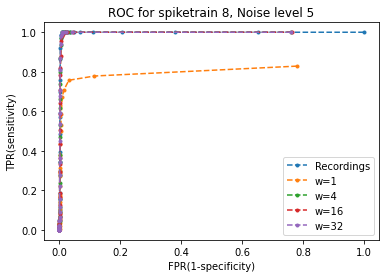

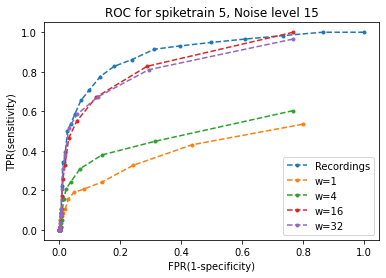

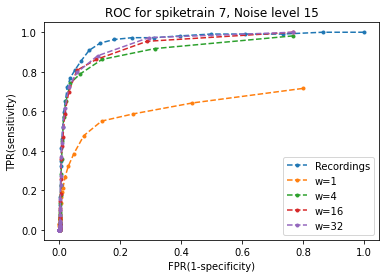

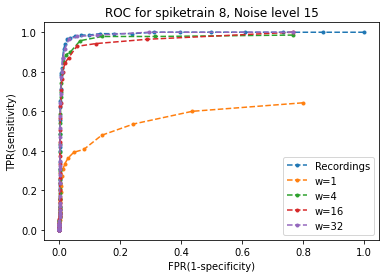

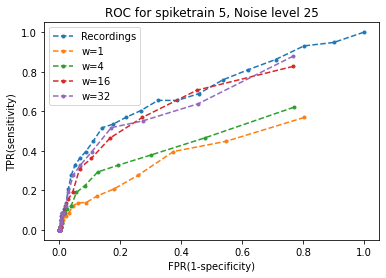

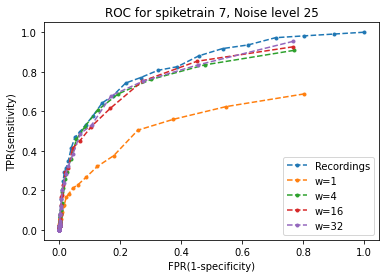

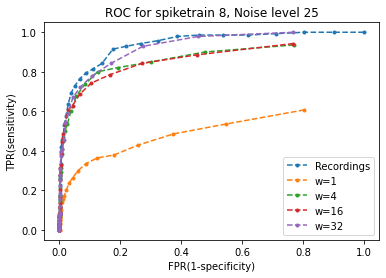

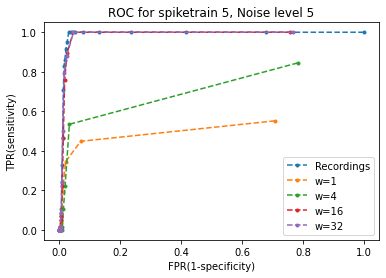

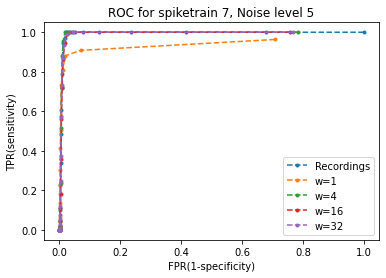

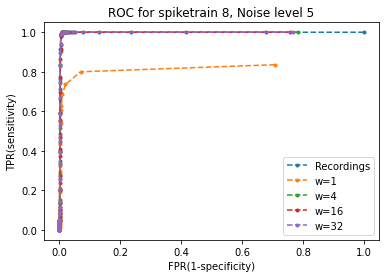

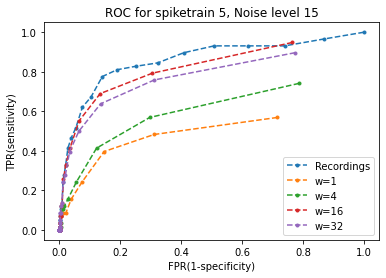

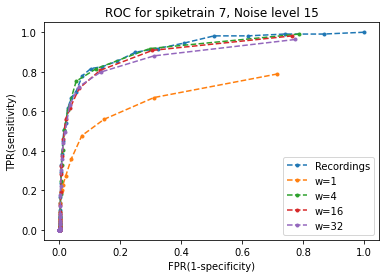

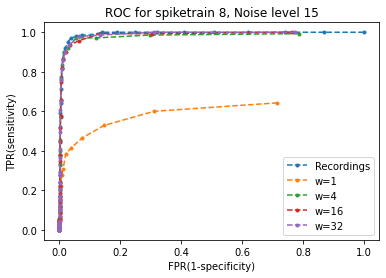

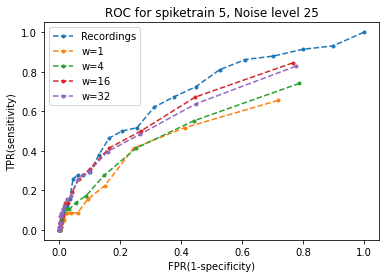

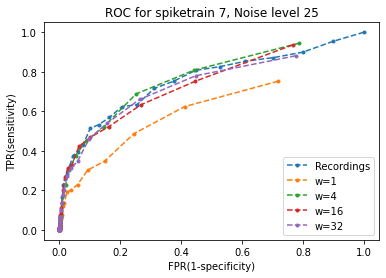

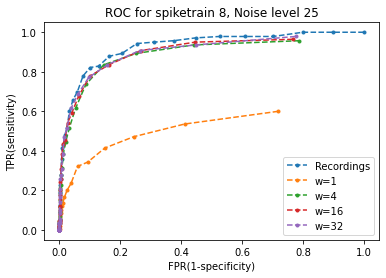

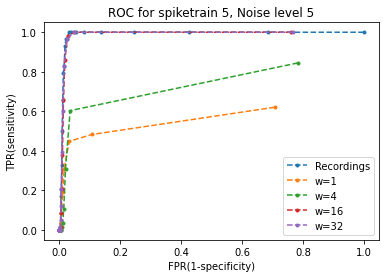

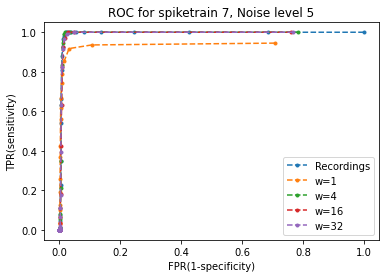

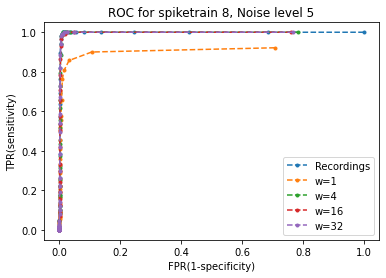

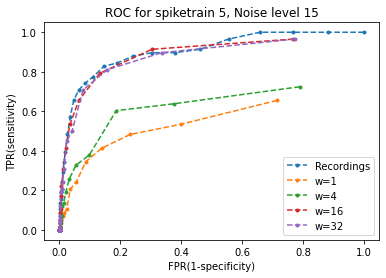

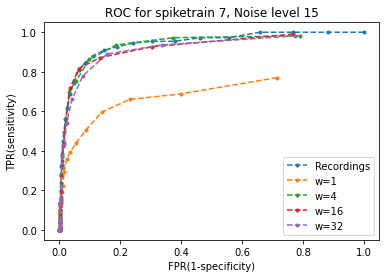

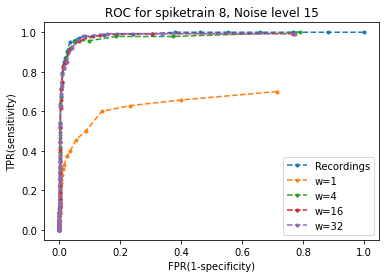

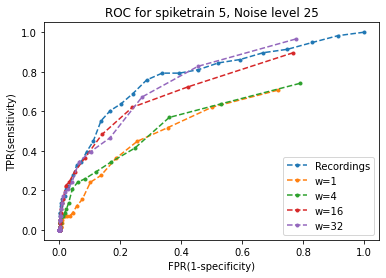

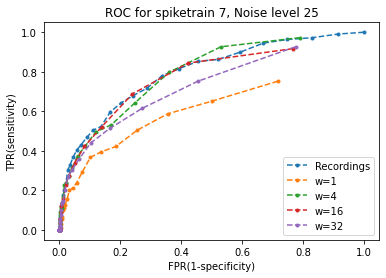

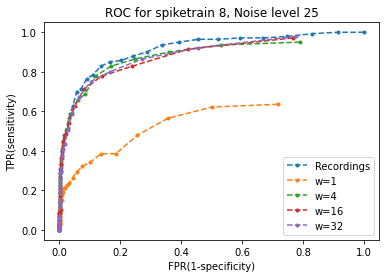

In [127]:
for ndx,tpr_all_single in enumerate(tpr_all_list):    
    for idx in range(len(tpr_all_single)):
        plot_roc_list(fpr_list=fpr_all_list[ndx][idx], tpr_list=tpr_all_list[ndx][idx], 
                    labels=["Recordings"]+[f"w={w_i}" for w_i in w],
                    spiketrains_labels=spike_indexes,
                    append_title=f", Noise level {noise_levels[idx]}")

In [103]:
neo_list

[{'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
  'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f7b6dc01ac0>,
  'w': <HDF5 dataset "w": shape (4,), type "<i8">,
  'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">},
 {'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
  'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f7b6d759fa0>,
  'w': <HDF5 dataset "w": shape (4,), type "<i8">,
  'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">},
 {'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,

In [122]:
info_list = []
for neo_dict in neo_list:
    noise_level = neo_dict["recordings"].info["recordings"]["noise_level"]
    fs = neo_dict["recordings"].info["recordings"]["fs"]
    spiketrains_list = neo_dict["recordings"].spiketrains
    spiketrain_snr_list = np.array([spiketrain.annotations["snr"] for spiketrain in spiketrains_list])
    spiketrain_snr_db_list = 20*np.log10(spiketrain_snr_list)
    print(f"Noise_level:{noise_level}uV Fs={fs}")
    print("SNR",spiketrain_snr_list)
    print("SNR(db)", spiketrain_snr_db_list)
    
    #Saving data to info_dict
    info ={}
    info["noise_level"]=noise_level
    info["fs"]=fs
    info["spiketrain_snr_list"]=spiketrain_snr_list
    info["spiketrain_snr_db_list"]=spiketrain_snr_db_list
    info_list+=[info]

Noise_level:5uV Fs=20000.0
SNR [11.41159592 16.50027008 14.24665222 13.61954498 11.47311783 45.1616333
 36.11300659 51.98359375 29.35496521 26.66307068]
SNR(db) [21.1469277  24.34982106 23.07425646 22.68325197 21.19362908 33.0953928
 31.15327294 34.317326   29.3536314  28.51820328]
Noise_level:25uV Fs=20000.0
SNR [ 2.28231918  3.30005402  2.84933044  2.723909    2.29462357  9.03232666
  7.22260132 10.39671875  5.87099304  5.33261414]
SNR(db) [ 7.16752761 10.37042097  9.09485637  8.70385188  7.21422899 19.11599272
 17.17387286 20.33792591 15.37423131 14.53880319]
Noise_level:50uV Fs=20000.0
SNR [1.14115959 1.65002701 1.42466522 1.3619545  1.14731178 4.51616333
 3.61130066 5.19835937 2.93549652 2.66630707]
SNR(db) [ 1.1469277   4.34982106  3.07425646  2.68325197  1.19362908 13.0953928
 11.15327294 14.317326    9.3536314   8.51820328]
Noise_level:100uV Fs=20000.0
SNR [0.5705798  0.8250135  0.71233261 0.68097725 0.57365589 2.25808167
 1.80565033 2.59917969 1.46774826 1.33315353]
SNR(db) [-

In [109]:
import pandas as pd

In [123]:
array_snr = [ [info["noise_level"], info["fs"]] + list(info["spiketrain_snr_list"]) for info in info_list]
array_snr_db = [ [info["noise_level"], info["fs"]] + list(info["spiketrain_snr_db_list"]) for info in info_list]

In [124]:
indexes = [str(i) for i in  range(10)]
df_snr = pd.DataFrame(array_snr, columns=["Noise", "Fs"] + indexes)
df_snr_db = pd.DataFrame(array_snr_db, columns=["Noise", "Fs"] + indexes)

In [125]:
df_snr

,Noise,Fs,0,1,2,3,4,5,6,7,8,9
0,5,20000.0,11.411596,16.500270,14.246652,13.619545,11.473118,45.161633,36.113007,51.983594,29.354965,26.663071
1,25,20000.0,2.282319,3.300054,2.849330,2.723909,2.294624,9.032327,7.222601,10.396719,5.870993,5.332614
2,50,20000.0,1.141160,1.650027,1.424665,1.361954,1.147312,4.516163,3.611301,5.198359,2.935497,2.666307
3,100,20000.0,0.570580,0.825014,0.712333,0.680977,0.573656,2.258082,1.805650,2.599180,1.467748,1.333154
4,200,20000.0,0.285290,0.412507,0.356166,0.340489,0.286828,1.129041,0.902825,1.299590,0.733874,0.666577
5,300,20000.0,0.190193,0.275005,0.237444,0.226992,0.191219,0.752694,0.601883,0.866393,0.489249,0.444385


In [126]:
df_snr_db

,Noise,Fs,0,1,2,3,4,5,6,7,8,9
0,5,20000.0,21.146928,24.349821,23.074256,22.683252,21.193629,33.095393,31.153273,34.317326,29.353631,28.518203
1,25,20000.0,7.167528,10.370421,9.094856,8.703852,7.214229,19.115993,17.173873,20.337926,15.374231,14.538803
2,50,20000.0,1.146928,4.349821,3.074256,2.683252,1.193629,13.095393,11.153273,14.317326,9.353631,8.518203
3,100,20000.0,-4.873672,-1.670779,-2.946343,-3.337348,-4.826971,7.074793,5.132673,8.296726,3.333031,2.497603
4,200,20000.0,-10.894272,-7.691379,-8.966943,-9.357948,-10.847571,1.054193,-0.887927,2.276126,-2.687568,-3.522997
5,300,20000.0,-14.416097,-11.213204,-12.488769,-12.879773,-14.369396,-2.467632,-4.409752,-1.245699,-6.209394,-7.044822
